In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from snAPI.Main import *
import pandas as pd
sys.path.append("../")
from HH import HH_T3
from Functions import *

In [2]:
def GetPos(filename):
    parts=filename[:-4].split('_')
    x=float(parts[1])
    y=float(parts[2])
    return x,y
def GetGatedCounts(filename,T):
    sn.getDevice()
    sn.getFileDevice(filename)
    sn.initDevice(MeasMode.T3)
    t_resol=sn.deviceConfig['Resolution']/1000 #in ns
    sn.raw.measure()
    data = sn.raw.getData()
    channels=sn.raw.channel(data)
    dTimes=sn.raw.dTime_T3(data)*t_resol
    sn.closeDevice()
    print(dTimes)
    return np.size(dTimes)

In [3]:
def ImageData(pathtoPTUs,gate):
    arr=np.array([0,0,0])
    for file in os.listdir(pathtoPTUs):
        if file[0:3]=='PTU':
            x,y=GetPos(file)
            c=GetGatedCounts(pathtoPTUs+file,gate)
            print(c)
            arr=np.vstack((arr,[x,y,c]))
    arr=np.delete(arr,0,0)
    return arr

In [4]:
sn=snAPI()

In [15]:
data=HH_T3(sn,'../../../Acquisition/Acquisition2/Data/Trial/PTU_0.00_0.00.ptu')

In [21]:
data.df

,dTimes,absTimes,Channels
0,12.735,4.532876e+07,3.0
1,27.767,6.002642e+07,3.0
2,17.658,4.261248e+08,3.0


In [20]:
pathtoPTUs='../../../Acquisition2/Data/Trial/'

In [21]:
os.listdir('../../../Acquisition2/Data/Trial')

['PTU_0.00_0.00.ptu',
 'PTU_0.00_0.25.ptu',
 'PTU_0.00_0.50.ptu',
 'PTU_0.00_0.75.ptu',
 'PTU_0.00_1.00.ptu',
 'PTU_0.25_0.00.ptu',
 'PTU_0.25_0.25.ptu',
 'PTU_0.25_0.50.ptu',
 'PTU_0.25_0.75.ptu',
 'PTU_0.25_1.00.ptu',
 'PTU_0.50_0.00.ptu',
 'PTU_0.50_0.25.ptu',
 'PTU_0.50_0.50.ptu',
 'PTU_0.50_0.75.ptu',
 'PTU_0.50_1.00.ptu',
 'PTU_0.75_0.00.ptu',
 'PTU_0.75_0.25.ptu',
 'PTU_0.75_0.50.ptu',
 'PTU_0.75_0.75.ptu',
 'PTU_0.75_1.00.ptu',
 'PTU_1.00_0.00.ptu',
 'PTU_1.00_0.25.ptu',
 'PTU_1.00_0.50.ptu',
 'PTU_1.00_0.75.ptu',
 'PTU_1.00_1.00.ptu']

In [22]:
d=ImageData(pathtoPTUs,0)

[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.    12.554  0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.    24.036  0.     0.   ]
27
[ 0.     0.    15.355  0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.    15.703  0.     0.     0.     0.
  0.     0.     0.     8.184  0.     0.     0.     0.     1.461  0.   ]
30
[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 27.456  0.     0.     0.     0.     0.   ]
26
[ 0.     0.     0.     0.     0.     7.036  0.     0.     0.     7.335
  0.     0.     0.     0.     0.    25.832  0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.   ]
27
[ 0.     0.     0.     0.     0.     0.     0.     0.    27.521  0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.    28.252
  0.     0.     0.     0.     0.     0.     8.58   0.     0.   ]
29
[ 0.     0.     

In [23]:
d.T[2]

array([27., 30., 26., 27., 29., 25., 27., 26., 26., 24., 25., 26., 29.,
       27., 27., 25., 27., 27., 27., 23., 25., 23., 26., 24., 23.])

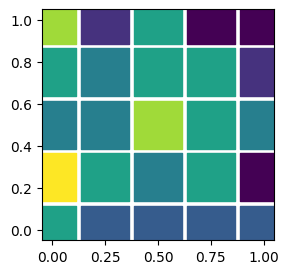

In [24]:
plt.figure(figsize=(3,3))
plt.scatter(d.T[0],d.T[1],c=d.T[2],marker='s',s=1200)